# Метод опорных векторов (Support vector machine, SVM)

Рассмотрим теперь другой подход к построению функции потерь, основанный на максимизации зазора между классами. Будем рассматривать линейные классификаторы вида

$$a(x) = sign ( \langle w, x \rangle + b), \ \ \ w \in R^d, \ \ \ b \in R.$$

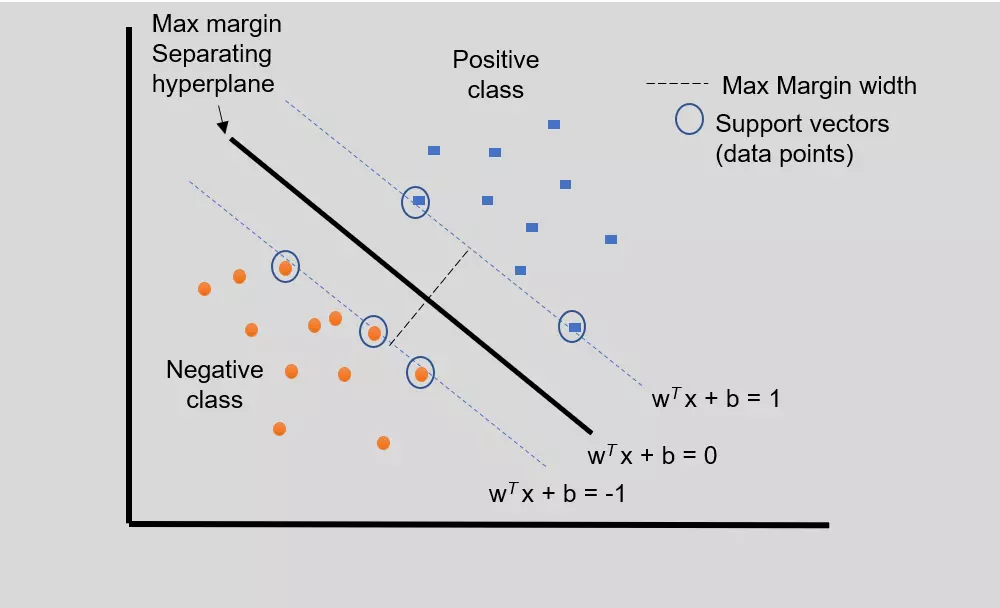

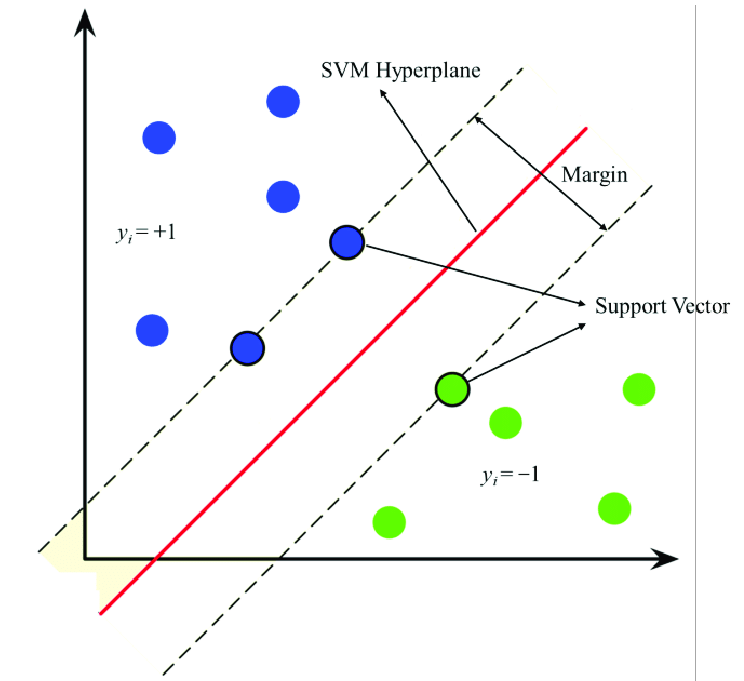

## Разделимый случай

Будем считать, что существуют такие параметры $w_{∗}$ и $b_{∗}$, что соответствующий им классификатор $a(x)$ не допускает ни одной ошибки на обучающей выборке. В этом случае говорят, что выборка *линейно разделима*.

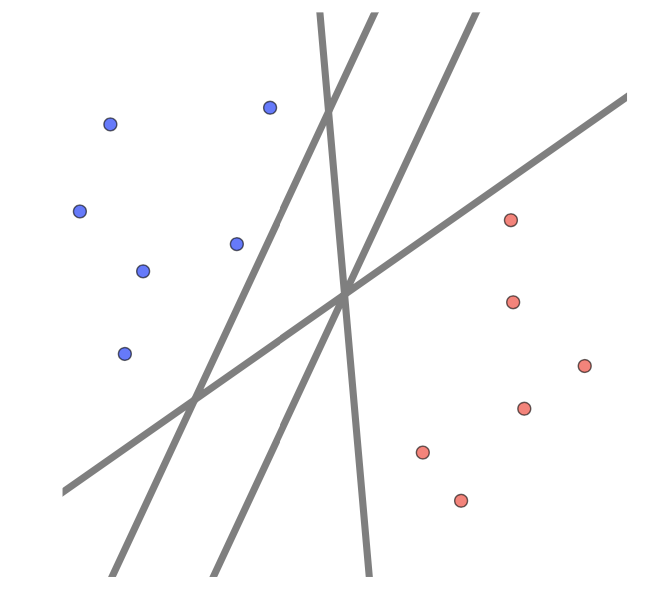

При этом гиперплоскость может быть проведена не единственным образом и возникает задача отыскания оптимальной разделяющей гиперплоскости.

Пусть задан некоторый классификатор $a(x) = sign(\langle w, x \rangle + b)$. Заметим, что если одновременно умножить параметры $w$ и $b$ на одну и ту же положительную константу, то классификатор не изменится. Распорядимся этой свободой выбора и отнормируем параметры так, что

$$\min_{x \in X} | \langle w, x \rangle + b | = 1.$$

Можно показать, что расстояние от произвольной точки $x_0 \in R^d$ до гиперплоскости, определяемой данным классификатором, равно

$$ \rho (x_0, a) = \frac{| \langle w, x \rangle + b |}{|| w ||}$$

Тогда расстояние от гиперплоскости до ближайшего объекта обучающей выборки равно
$$ \min_{x \in X} \frac{| \langle w, x \rangle + b |}{|| w ||} = \frac{1}{|| w ||} \min_{x \in X} | \langle w, x \rangle + b | = \frac{1}{|| w ||}$$

Данная величина также называется **отступом (margin)**.

Таким образом, если классификатор без ошибок разделяет обучающую выборку, то ширина его разделяющей полосы равна $\frac{2}{||w||}.$ Известно, что максимизация ширины разделяющей полосы приводит к повышению обобщающей способности клаcсификатора. Вспомним также, что на повышение обобщающей способности направлена и регуляризация, которая штрафует большую норму весов — а чем больше норма весов, тем меньше ширина разделяющей полосы.

Итак, требуется построить классификатор, идеально разделяющий обучающую выборку, и при этом имеющий максимальный отступ. Запишем соответствующую оптимизационную задачу, которая и будет определять **метод опорных векторов для линейно разделимой выборки (hard margin support vector machine)**:

$$
\begin{equation*}
 \begin{cases}
   \frac{1}{2} ||w||^2 \rightarrow \min\limits_{w, b} \\
   y_i (\langle w, x_i \rangle + b) \geq 1, \ \ \ i = 1, ..., l
 \end{cases}
\end{equation*}
$$

Здесь мы воспользовались тем, что линейный классификатор дает правильный ответ на объекте $x_i$ тогда и только тогда, когда $y_i (\langle w, x_i \rangle + b) \geq 0$. Более того, из условия нормировки следует, что $y_i (\langle w, x_i \rangle + b) \geq 1.$

В данной задаче функционал является строго выпуклым, а ограничения линейными, поэтому сама задача является выпуклой и имеет единственное решение. Более того, задача является квадратичной и может быть решена крайне эффективно.

## Неразделимый случай

Рассмотрим теперь общий случай, когда выборку невозможно идеально разделить гиперплоскостью. Это означает, что какие бы $w$ и $b$ мы не взяли, хотя бы одно из ограничений в задаче будет нарушено:

$$ \exists x_i \in X: y_i (\langle w, x_i \rangle + b) < 1.$$

Сделаем эти ограничения «мягкими», введя штраф $\xi_i \geq 0$ за их нарушение ($\xi_i$ называют **slack variables**):

$$y_i (\langle w, x_i \rangle + b) \geq 1 - \xi_i , \ \ \ i = 1, ..., l.$$

Отметим, что если отступ объекта лежит между нулем и единицей $(0 \leq y_i (\langle w, x_i \rangle + b) < 1)$, то объект верно классифицируется, но имеет ненулевой штраф $\xi > 0$. Таким образом, мы штрафуем объекты за попадание внутрь разделяющей полосы.

Величина $\frac{1}{||w||}$ в данном случае называется **мягким отступом (soft margin)**. С одной стороны, мы хотим максимизировать отступ, с другой — минимизировать штраф за неидеальное разделение выборки $\sum\limits_{i = 1}^{l} \xi_i.$ Эти две задачи противоречат друг другу: как правило, излишняя подгонка под выборку приводит к маленькому отступу, и наоборот — максимизация отступа приводит к большой ошибке на обучении. В качестве компромисса будем минимизировать взвешенную сумму двух указанных величин. Приходим к оптимизационной задаче, соответствующей **методу опорных векторов для линейно неразделимой выборки (soft margin support vector machine)**

$$
\begin{equation*}
 \begin{cases}
   \frac{1}{2} ||w||^2 + C \sum\limits_{i = 1}^{l} \xi_i \rightarrow \min\limits_{w, b, \xi} \\
   y_i (\langle w, x_i \rangle + b) \geq 1 - \xi_i, \ \ \ i = 1, ..., l \\
   \xi_i \geq 0, \ \ \ i = 1, ..., l.
 \end{cases}
\end{equation*}
$$

Чем больше здесь параметр $C$, тем сильнее мы будем настраиваться на обучающую выборку.
Данная задача также является выпуклой и имеет единственное решение.

## Сведение к безусловной задаче

Попробуем свести задача метода опорных векторов к задаче безусловной оптимизации.

Перепишем условия задачи:

$$
\begin{equation*}
 \begin{cases}
   \xi_i \geq 1 - y_i (\langle w, x_i \rangle + b) \\
   \xi_i \geq 0
 \end{cases}
\end{equation*}
$$

Поскольку при этом в функционале требуется, чтобы штрафы $\xi_i$ были как можно меньше, то можно получить следующую явную формулу для них:
$$ \xi_i = \max(0, 1 - y_i (\langle w, x_i \rangle + b)).$$

Данной выражение для $\xi_i$ уже учитывает в себе все ограничения выше описанной задачи. Значит, если подставить его в функционал, то получим безусловную задачу оптимизации:

$$\frac{1}{2} ||w||^2 + C \sum\limits_{i = 1}^{l} \max(0, 1 - y_i (\langle w, x_i \rangle + b)) \rightarrow \min\limits_{w, b, \xi}$$

Эта задача является негладкой, поэтому решать её может быть достаточно тяжело. Тем не менее, она показывает, что метод опорных векторов, по сути, тоже строит верхнюю оценку вида $L(y, z) = max(0, 1 − yz)$ на долю ошибок, и добавляет к ней стандартную квадратичную регуляризацию.

$L(y, z) = \max(0, 1 − yz)$ - **кусочно-линейная функция потерь (hinge loss)**.

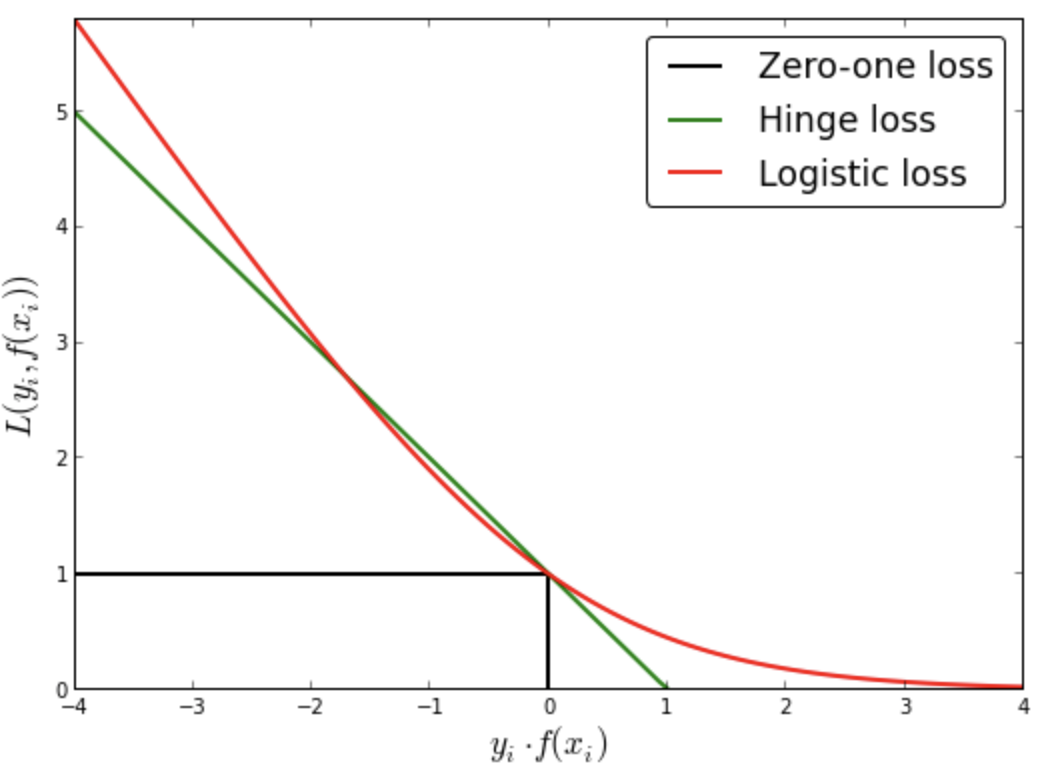

## Ядра в методе опорных векторов (Kernel trick)

### Добавление новых признаков и kernel trick

Чтобы применять SVM в нелинейном случае, строилось спрямляющее пространство. В основе этого лежит очень простая и очень красивая идея: если в каком-то исходном пространстве признаков классы не являются линейно разделимыми, то может быть можно отобразить это пространство признаков в какое-то новое, в котором классы уже будут линейно разделимы.

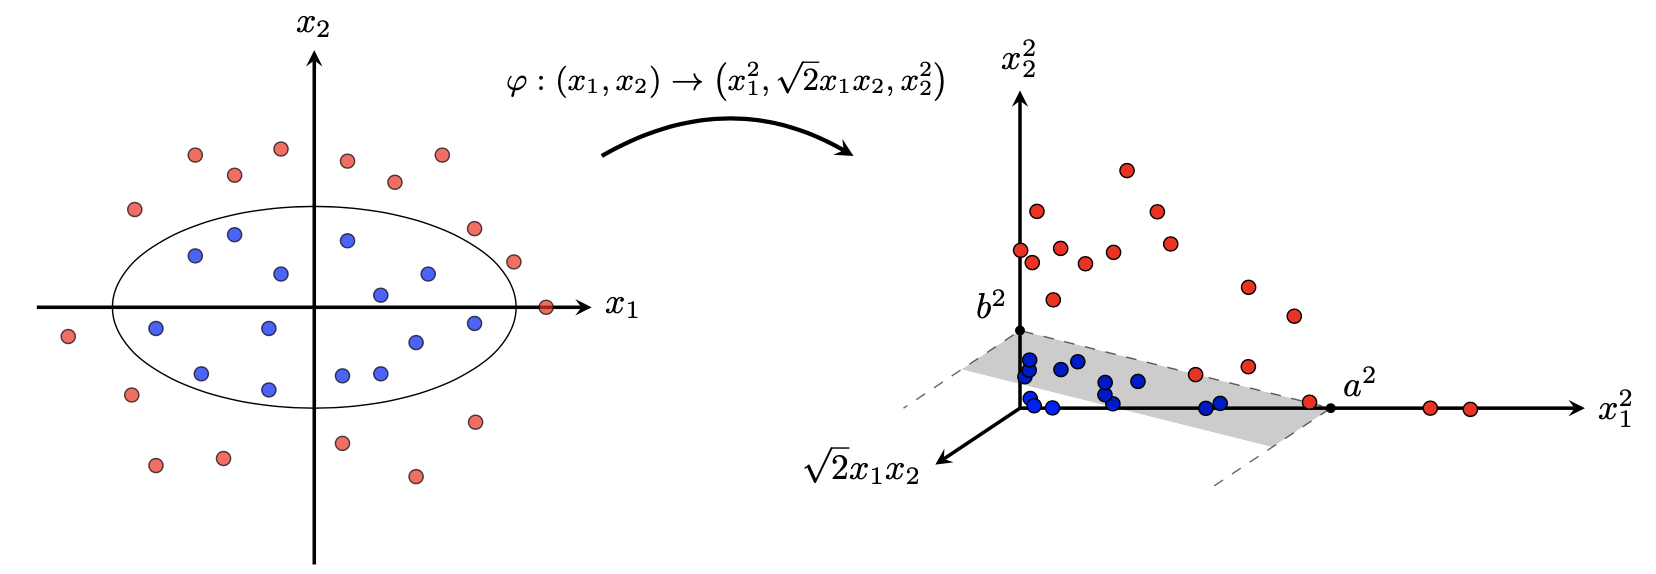

На рисунке представлен пример построения спрямляющего пространства.

Не обязательно задавать это отображение явно, так как в SVM везде фигурирует только скалярное произведение вида $\langle w, x \rangle.$

Пусть $\varphi(x)$ — спрямляющее отображение, тогда, чтобы записать SVM в спрямляющем пространстве, необходимо во всех формулах сделать следующие подстановки:

$$x \rightarrow \varphi(x), \ \ \ \ \ w \rightarrow \varphi(w), \ \ \ \ \ \langle w, x \rangle \rightarrow \langle \varphi(w), \varphi(x) \rangle $$

Тогда метод SVM может быть сформулирован в исходном пространстве, если в качестве скалярного произ-
ведения использовать, возможно, нелинейную симметричную функцию

$$ K(w, x) = \langle \varphi(w), \varphi(x) \rangle $$

и таким образом получать нелинейную разделяющую поверхность. Эта идея называется **kernel trick.**

### Линейное ядро

В простейшем случае ядро совпадает со скалярным произведением:

$$K(w, x) = \langle w, x \rangle .$$

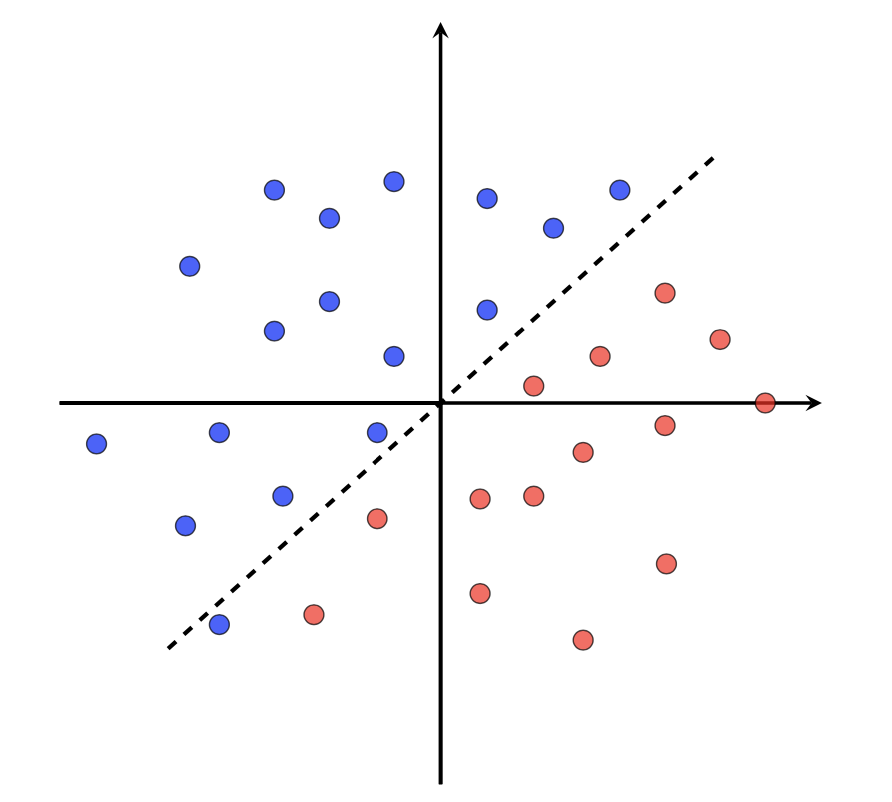

Следует отметить, что линейное ядро в некоторых задачах — самый лучший выбор, например в задачах классификации текстов, и не стоит выкидывать его из рассмотрения.

### Полиномиальное ядро

Другой пример — это полиномиальное ядро:

$$ K(w, x) = (\langle w, x \rangle + r)^d .$$

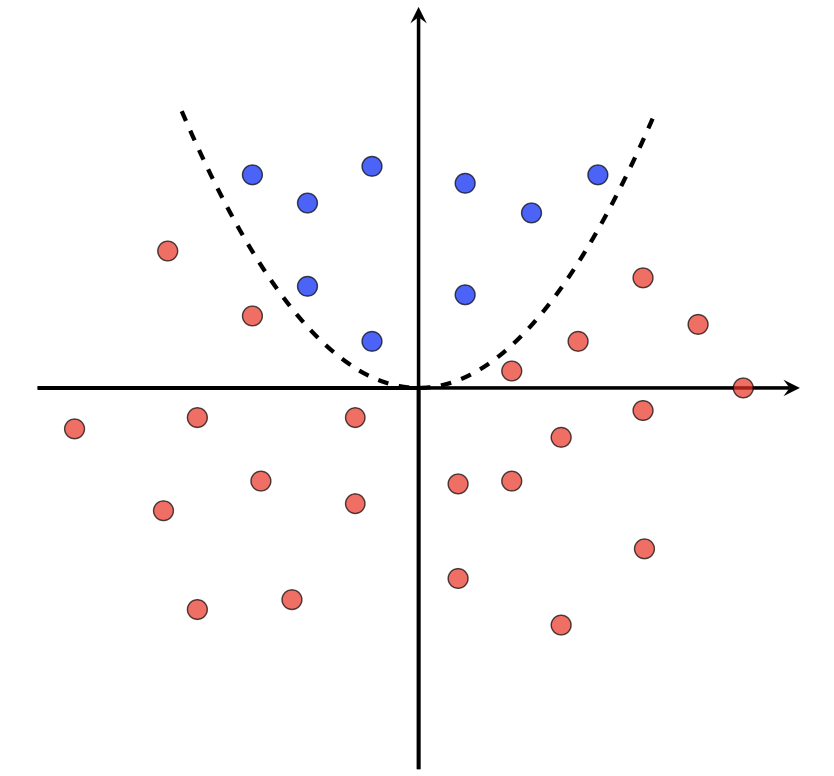

Полиномиальное ядро получается, если в качестве спрямляемого пространство выступает пространство многочленов не выше определенной степени.

### Радиальное ядро

И другое часто используемое ядро — это радиальное ядро:
    
$$ K(w, x) = e^{-\gamma || w - x||^2}$$

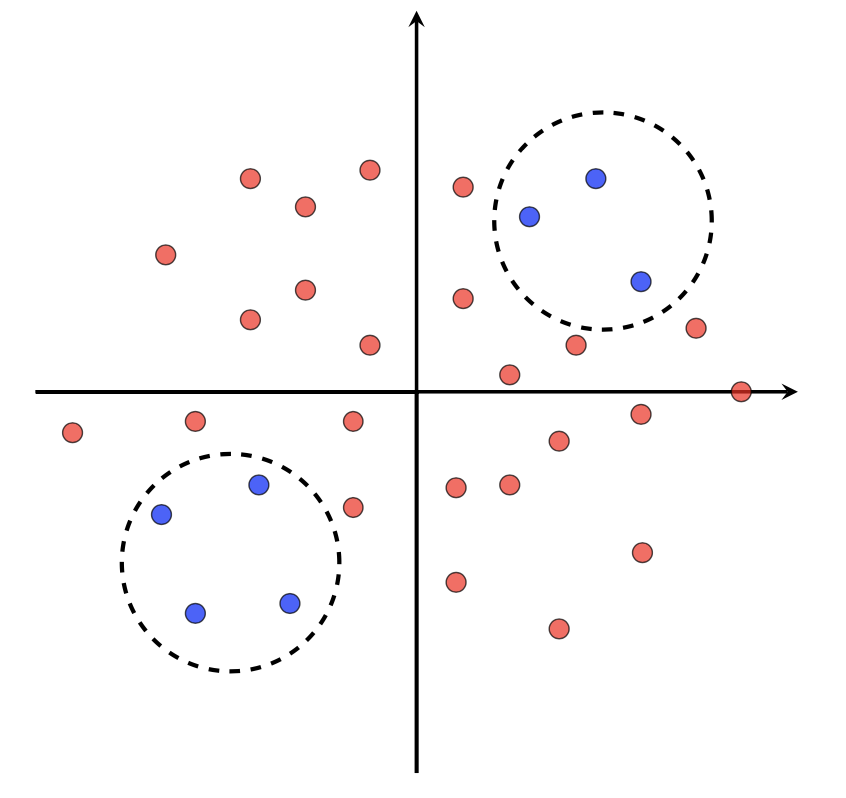

Поскольку радиальное ядро выражается через евклидово расстояние, будут проявляться основные проблемы метрических алгоритмов, в том числе проклятие размерности. Именно поэтому не стоит применять это ядро, если признаков действительно очень-очень много.

Но так или иначе, оно позволяет строить очень сложные границы классов.

## Литература

* Mohri, M., Rostamizadeh, A., Talwalkar, A. Foundations of Machine Learning. // MIT Press, 2012.

* Курс "Машинное обучение" на ФКН ВШЭ: https://github.com/esokolov/ml-course-hse

* Специализация "Машинное обучение и анализ данных" от МФТИ и Яндекса на Coursera https://github.com/minhdai2410/machine-learning-data-analysis-yandex-mipt-coursera